# EPL <br>
(England Premier League)

세계축구 4대 리그중 하나로 영국에서 하는 리그

총 20개의 팀으로 1시즌 38경기를 하게 된다

-----

1. 토트넘의 시즌 별 승점

2. EPL 빅 6의 지금까지의 흐름

2. 토트넘의 시즌 별 골 수

3. 지금까지의 최다 골과 최다 실점

4. 토트넘과 가장 많이 경기를 한 클럽

5. 아스날과의 기록

-----

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%matplotlib nbagg
%matplotlib inline

----

EPL 1993 - 2018 경기 기록  <BR>
프리미어리그 출범 후 모든 지금까지 모든 기록 

In [2]:
df = pd.read_csv("D:/jupyter/pandas/epl-results-19932018/EPL_Set.csv",sep=",")
df=df.drop("Div",axis=1)

In [3]:
df.shape

(9664, 10)

In [5]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94
1,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,14/08/93,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94
3,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
4,14/08/93,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94


Date = 경기를 한 날짜 ( 일 / 월 / 년 ) <BR>
HomeTeam = 홈 팀 이름 <BR>
AwayTeam = 어웨이 팀 이름 <BR>
FTHG = 최종시간(90분) 까지 홈팀이 넣은 골의 수<BR>
FTAG = 최종시간(90분) 까지 어웨이팀이 넣은 골의 수<BR>
FTR = 최종결과 ( H : 홈팀 승 / A: 어웨이 팀 승 / D : 무승부 )<BR>
HTHG = 전반전(45분) 까지 홈팀이 넣은 골의 수 <BR>
HTAG = 전반전(45분) 까지 어웨이팀이 넣은 골의 수 <BR>
HTR = 전반전까지의 결과 ( H : 홈팀 승 / A: 어웨이 팀 승 / D : 무승부 ) <BR>
Season = 경기가 진행된 시즌

---

<B>HTHG , HTAG , HTR 의 NaN 값을 0로 변경 
    

In [6]:
df = df.fillna(value='0')

-----

# 1. 토트넘이 지금까지 제일 많은 승점을 얻은 시즌

In [257]:
tot=df.loc[((df.HomeTeam=="Tottenham") | (df.AwayTeam=="Tottenham")),:]
tot=tot.set_index("Date")
# 토트넘의 기록만 가져옴

In [258]:
tot.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
Date,,,,,,,,,
14/08/93,Newcastle,Tottenham,0,1,A,0,0,0,1993-94
16/08/93,Tottenham,Arsenal,0,1,A,0,0,0,1993-94
21/08/93,Tottenham,Man City,1,0,H,0,0,0,1993-94
25/08/93,Liverpool,Tottenham,1,2,A,0,0,0,1993-94
28/08/93,Aston Villa,Tottenham,1,0,H,0,0,0,1993-94


In [259]:
tot["Tottenham_Point"]=tot["FTR"]
tot.head()# Point 라는 컬럼을 새로 만들어서 최종결과의 알파벳을 집어넣는다.

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,Tottenham_Point
Date,,,,,,,,,,
14/08/93,Newcastle,Tottenham,0,1,A,0,0,0,1993-94,A
16/08/93,Tottenham,Arsenal,0,1,A,0,0,0,1993-94,A
21/08/93,Tottenham,Man City,1,0,H,0,0,0,1993-94,H
25/08/93,Liverpool,Tottenham,1,2,A,0,0,0,1993-94,A
28/08/93,Aston Villa,Tottenham,1,0,H,0,0,0,1993-94,H


In [260]:
def point(x):
    if x=="H": return 3
    elif x=="D" : return 1
    else: return 0
# H 홈(토트넘)이 이겼으면 승점 3점 // D 무승부면 승점 1점

In [261]:
tot["Tottenham_Point"]=tot["Tottenham_Point"].apply(point)
tot.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,Tottenham_Point
Date,,,,,,,,,,
14/08/93,Newcastle,Tottenham,0,1,A,0,0,0,1993-94,0
16/08/93,Tottenham,Arsenal,0,1,A,0,0,0,1993-94,0
21/08/93,Tottenham,Man City,1,0,H,0,0,0,1993-94,3
25/08/93,Liverpool,Tottenham,1,2,A,0,0,0,1993-94,0
28/08/93,Aston Villa,Tottenham,1,0,H,0,0,0,1993-94,3


▽▽토트넘이 홈이었을 때 승리 승점

In [262]:
Hometot=tot.loc[(tot.HomeTeam=="Tottenham")&(tot.FTR=="H"),:]

In [263]:
Hometot=Hometot.groupby("Season").sum() # 시즌별로 Point(승점)을 합침

In [264]:
Hometot.head()

,FTHG,FTAG,Tottenham_Point
Season,,,
1993-94,12,2,12
1994-95,23,7,30
1995-96,18,5,27
1996-97,12,2,24
1997-98,14,4,21


In [265]:
Hometot=Hometot.drop("FTHG",axis=1)
Hometot=Hometot.drop("FTAG",axis=1)
Hometot.head()

,Tottenham_Point
Season,
1993-94,12
1994-95,30
1995-96,27
1996-97,24
1997-98,21



 ▽ ▽ 토트넘이 어웨이이었을 때 승리 승점 

In [266]:
Awaytot=tot.loc[(tot["AwayTeam"] == "Tottenham")&(tot["FTR"]=="A"),:]
Awaytot.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,Tottenham_Point
Date,,,,,,,,,,
14/08/93,Newcastle,Tottenham,0,1,A,0,0,0,1993-94,0
25/08/93,Liverpool,Tottenham,1,2,A,0,0,0,1993-94,0
11/12/1993,Man City,Tottenham,0,2,A,0,0,0,1993-94,0
28/12/93,West Ham,Tottenham,1,3,A,0,0,0,1993-94,0
26/03/94,Everton,Tottenham,0,1,A,0,0,0,1993-94,0


In [267]:
Awaytot["Tottenham_Point"]= 3
Awaytot=Awaytot.groupby("Season").sum()

D:\ana\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [268]:
Awaytot=Awaytot.drop("FTHG",axis=1) 
Awaytot=Awaytot.drop("FTAG",axis=1) # 필요없는 컬럼 삭제 
Awaytot.head()

,Tottenham_Point
Season,
1993-94,21
1994-95,18
1995-96,21
1996-97,15
1997-98,12


▽▽토트넘이 무승부 이었을 때 승점

In [269]:
Drawtot=tot.loc[((tot["AwayTeam"] == "Tottenham")|(tot["HomeTeam"] == "Tottenham"))&(tot["FTR"]=="D"),:]
Drawtot.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,Tottenham_Point
Date,,,,,,,,,,
1/9/1993,Tottenham,Chelsea,1,1,D,0,0,0,1993-94,1
11/9/1993,Sheffield United,Tottenham,2,2,D,0,0,0,1993-94,1
26/09/93,Ipswich,Tottenham,2,2,D,0,0,0,1993-94,1
23/10/93,Tottenham,Swindon,1,1,D,0,0,0,1993-94,1
20/11/93,Tottenham,Leeds,1,1,D,0,0,0,1993-94,1


In [270]:
Drawtot=Drawtot.groupby("Season").sum()

In [271]:
Drawtot=Drawtot.drop("FTHG",axis=1) 
Drawtot=Drawtot.drop("FTAG",axis=1) # 필요없는 컬럼 삭제 
Drawtot.head()

,Tottenham_Point
Season,
1993-94,12
1994-95,14
1995-96,13
1996-97,7
1997-98,11


In [272]:
Season_tot_Point=Awaytot+Hometot+Drawtot # 홈이었을 때 승리, 어웨이이었을 때 승리 , 무승부 했을 때 승점들의 총합

In [274]:
Season_tot_Point.head()

,Tottenham_Point
Season,
1993-94,45
1994-95,62
1995-96,61
1996-97,46
1997-98,44


In [275]:
Season_tot_Point.max() # 16/17 시즌  최종순위 2등

Tottenham_Point    86
dtype: int64

In [276]:
Season_tot_Point.min() # 97/98 시즌 최종순위 14등

Tottenham_Point    44
dtype: int64

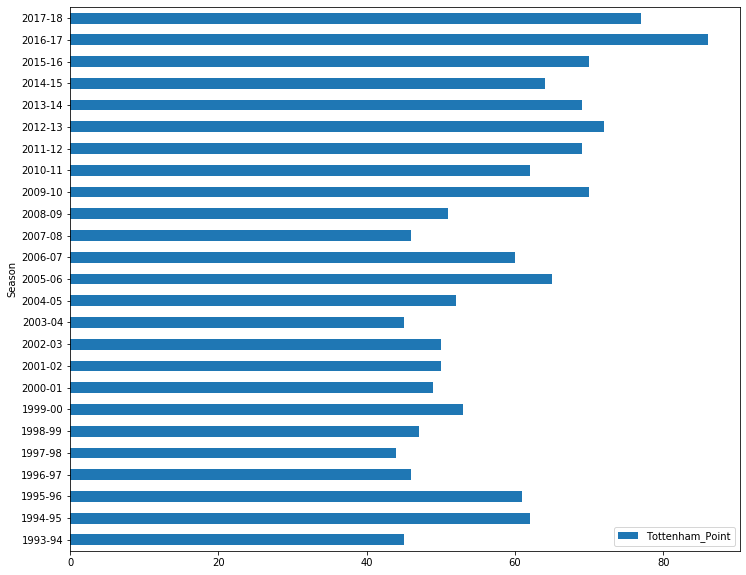

In [277]:
Season_tot_Point.plot(kind="barh",figsize=(12,10))

----------

# 2. EPL 빅 6의 지금까지의 흐름

빅 6란 [ 토트넘, 첼시, 아스날, 맨유, 맨시티, 리버풀 ] 을 의미한다.

첼시의 시즌별 승점 

In [280]:
che=df.loc[((df.HomeTeam=="Chelsea") | (df.AwayTeam=="Chelsea")),:]

In [281]:
che.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
2,14/08/93,Chelsea,Blackburn,1,2,A,0,0,0,1993-94
15,17/08/93,Wimbledon,Chelsea,1,1,D,0,0,0,1993-94
25,21/08/93,Ipswich,Chelsea,1,0,H,0,0,0,1993-94
38,25/08/93,Chelsea,QPR,2,0,H,0,0,0,1993-94
47,28/08/93,Chelsea,Sheffield Weds,1,1,D,0,0,0,1993-94


In [282]:
che["Chelsea_Point"] = che["FTR"].apply(point)

D:\ana\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [283]:
Homeche = che.loc[(che["HomeTeam"]=="Chelsea")&(che["FTR"]=="H"),:]

In [284]:
Homeche=Homeche.groupby("Season").sum()
Homeche=Homeche.drop("FTHG",axis=1) 
Homeche=Homeche.drop("FTAG",axis=1)

In [285]:
Drawche=che.loc[((che["AwayTeam"] == "Chelsea")|(che["HomeTeam"] == "Chelsea"))&(che["FTR"]=="D"),:]

In [286]:
Drawche=Drawche.groupby("Season").sum()
Drawche=Drawche.drop("FTHG",axis=1) 
Drawche=Drawche.drop("FTAG",axis=1)

In [287]:
Awayche = che.loc[(che["AwayTeam"]=="Chelsea")&(che["FTR"]=="A"),:]

In [288]:
Awayche["Chelsea_Point"] =3

D:\ana\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [289]:
Awayche=Awayche.groupby("Season").sum()
Awayche=Awayche.drop("FTHG",axis=1) 
Awayche=Awayche.drop("FTAG",axis=1)

In [291]:
total_che=Homeche+Drawche+Awayche
total_che.head()

,Chelsea_Point
Season,
1993-94,51
1994-95,54
1995-96,50
1996-97,59
1997-98,63


아스날의 승점

In [292]:
ars=df.loc[((df.HomeTeam=="Arsenal") | (df.AwayTeam=="Arsenal")),:]

In [293]:
ars["Arsenal_Point"] = ars["FTR"].apply(point)

D:\ana\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [294]:
Homears = ars.loc[(ars["HomeTeam"]=="Arsenal")&(ars["FTR"]=="H"),:]

In [295]:
Homears=Homears.groupby("Season").sum()
Homears=Homears.drop("FTHG",axis=1) 
Homears=Homears.drop("FTAG",axis=1)

In [296]:
Drawars=ars.loc[((ars["AwayTeam"] == "Arsenal")|(ars["HomeTeam"] == "Arsenal"))&(ars["FTR"]=="D"),:]

In [297]:
Drawars=Drawars.groupby("Season").sum()
Drawars=Drawars.drop("FTHG",axis=1) 
Drawars=Drawars.drop("FTAG",axis=1)

In [309]:
Awayars = ars.loc[(ars["AwayTeam"]=="Arsenal")&(ars["FTR"]=="A"),:]
Awayars["Arsenal_Point"] =3

D:\ana\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [311]:
Awayars=Awayars.groupby("Season").sum()
Awayars=Awayars.drop("FTHG",axis=1) 
Awayars=Awayars.drop("FTAG",axis=1)

In [312]:
total_ars=Homears+Drawars+Awayars
total_ars.head()

,Arsenal_Point
Season,
1993-94,71
1994-95,51
1995-96,63
1996-97,68
1997-98,78


맨유 승점

In [301]:
mu=df.loc[((df.HomeTeam=="Man United") | (df.AwayTeam=="Man United")),:]

In [314]:
mu["Man United_Point"] = mu["FTR"].apply(point)

D:\ana\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [317]:
Homemu=mu.loc[(mu["HomeTeam"]=="Man United")&(mu["FTR"]=="H"),:]
Homemu=Homemu.groupby("Season").sum()
Homemu=Homemu.drop("FTHG",axis=1) 
Homemu=Homemu.drop("FTAG",axis=1)

In [318]:
Drawmu=mu.loc[((mu["AwayTeam"] == "Man United")|(mu["HomeTeam"] == "Man United"))&(mu["FTR"]=="D"),:]
Drawmu=Drawmu.groupby("Season").sum()
Drawmu=Drawmu.drop("FTHG",axis=1) 
Drawmu=Drawmu.drop("FTAG",axis=1)

In [319]:
Awaymu =mu.loc[(mu["AwayTeam"]=="Man United")&(mu["FTR"]=="A"),:]
Awaymu["Man United_Point"] =3
Awaymu=Awaymu.groupby("Season").sum()
Awaymu=Awaymu.drop("FTHG",axis=1) 
Awaymu=Awaymu.drop("FTAG",axis=1)

D:\ana\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [320]:
total_mu=Homemu+Drawmu+Awaymu
total_mu.head()

,Man United_Point
Season,
1993-94,92
1994-95,88
1995-96,82
1996-97,75
1997-98,77


맨시티 승점

In [321]:
mc=df.loc[((df.HomeTeam=="Man City") | (df.AwayTeam=="Man City")),:]

In [323]:
mc["Man City_Point"] = mc["FTR"].apply(point)

D:\ana\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [324]:
Homemc=mc.loc[(mc["HomeTeam"]=="Man City")&(mc["FTR"]=="H"),:]
Homemc=Homemc.groupby("Season").sum()
Homemc=Homemc.drop("FTHG",axis=1) 
Homemc=Homemc.drop("FTAG",axis=1)

In [326]:
Drawmc=mc.loc[((mc["AwayTeam"] == "Man City")|(mc["HomeTeam"] == "Man City"))&(mc["FTR"]=="D"),:]
Drawmc=Drawmc.groupby("Season").sum()
Drawmc=Drawmc.drop("FTHG",axis=1) 
Drawmc=Drawmc.drop("FTAG",axis=1)

In [327]:
Awaymc =mc.loc[(mc["AwayTeam"]=="Man City")&(mc["FTR"]=="A"),:]
Awaymc["Man City_Point"] =3
Awaymc=Awaymc.groupby("Season").sum()
Awaymc=Awaymc.drop("FTHG",axis=1) 
Awaymc=Awaymc.drop("FTAG",axis=1)

D:\ana\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [328]:
total_mc=Homemc+Drawmc+Awaymc
total_mc.head()

,Man City_Point
Season,
1993-94,45
1994-95,49
1995-96,38
2000-01,34
2002-03,51


리버풀의 승점

In [329]:
li=df.loc[((df.HomeTeam=="Liverpool") | (df.AwayTeam=="Liverpool")),:]

In [330]:
li["Liverpool_Point"] = li["FTR"].apply(point)

D:\ana\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [331]:
Homeli=li.loc[(li["HomeTeam"]=="Liverpool")&(li["FTR"]=="H"),:]
Homeli=Homeli.groupby("Season").sum()
Homeli=Homeli.drop("FTHG",axis=1) 
Homeli=Homeli.drop("FTAG",axis=1)

In [332]:
Drawli=li.loc[((li["AwayTeam"] == "Liverpool")|(li["HomeTeam"] == "Liverpool"))&(li["FTR"]=="D"),:]
Drawli=Drawli.groupby("Season").sum()
Drawli=Drawli.drop("FTHG",axis=1) 
Drawli=Drawli.drop("FTAG",axis=1)

In [333]:
Awayli =li.loc[(li["AwayTeam"]=="Liverpool")&(li["FTR"]=="A"),:]
Awayli["Liverpool_Point"] =3
Awayli=Awayli.groupby("Season").sum()
Awayli=Awayli.drop("FTHG",axis=1) 
Awayli=Awayli.drop("FTAG",axis=1)

D:\ana\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [335]:
total_li=Homeli+Drawli+Awayli
total_li.head()

,Liverpool_Point
Season,
1993-94,60
1994-95,74
1995-96,71
1996-97,68
1997-98,65


종합

In [340]:
total_BIG6=pd.merge(Season_tot_Point,total_che,on="Season")
total_BIG6= pd.merge(total_BIG6,total_mu,on="Season")
total_BIG6= pd.merge(total_BIG6,total_mc,on="Season")
total_BIG6= pd.merge(total_BIG6,total_li,on="Season")
total_BIG6= pd.merge(total_BIG6,total_ars,on="Season")


In [341]:
total_BIG6.head()

,Tottenham_Point,Chelsea_Point,Man United_Point,Man City_Point,Liverpool_Point,Arsenal_Point
Season,,,,,,
1993-94,45,51,92,45,60,71
1994-95,62,54,88,49,74,51
1995-96,61,50,82,38,71,63
2000-01,49,61,80,34,69,70
2002-03,50,67,83,51,64,78


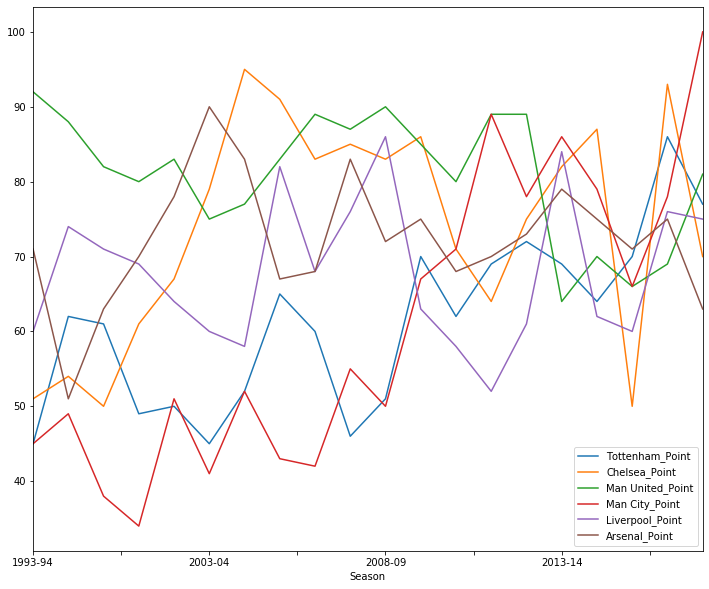

In [347]:
total_BIG6.plot(figsize=(12,10))

---

# 3. 시즌별 득점, 실점 수 

In [27]:
tot.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,Point
Date,,,,,,,,,,
14/08/93,Newcastle,Tottenham,0,1,A,0,0,0,1993-94,0
16/08/93,Tottenham,Arsenal,0,1,A,0,0,0,1993-94,0
21/08/93,Tottenham,Man City,1,0,H,0,0,0,1993-94,3
25/08/93,Liverpool,Tottenham,1,2,A,0,0,0,1993-94,0
28/08/93,Aston Villa,Tottenham,1,0,H,0,0,0,1993-94,3


In [28]:
Goaltot = tot[["HomeTeam","AwayTeam","FTHG","FTAG","Season"]]
Goaltot.head()

,HomeTeam,AwayTeam,FTHG,FTAG,Season
Date,,,,,
14/08/93,Newcastle,Tottenham,0,1,1993-94
16/08/93,Tottenham,Arsenal,0,1,1993-94
21/08/93,Tottenham,Man City,1,0,1993-94
25/08/93,Liverpool,Tottenham,1,2,1993-94
28/08/93,Aston Villa,Tottenham,1,0,1993-94


토트넘이 홈이었을 때 득점과 실점 

In [29]:
Home_Goaltot=Goaltot.loc[Goaltot.HomeTeam=="Tottenham",:]

In [30]:
Home_Goaltot=Home_Goaltot.groupby("Season").sum()
Home_Goaltot.head()

,FTHG,FTAG
Season,,
1993-94,29,33
1994-95,32,25
1995-96,26,19
1996-97,19,17
1997-98,23,22


토트넘이 어웨이 이었을 때 득점과 실점

In [31]:
Away_Goaltot=Goaltot.loc[Goaltot.AwayTeam=="Tottenham",:]

In [32]:
Away_Goaltot=Away_Goaltot.groupby("Season").sum()
Away_Goaltot.head()

,FTHG,FTAG
Season,,
1993-94,26,25
1994-95,33,34
1995-96,19,24
1996-97,34,25
1997-98,34,21


시즌별 득점

In [33]:
Season_goaltot=Home_Goaltot.FTHG+Away_Goaltot.FTAG
Season_goaltot.head()

Season
1993-94    54
1994-95    66
1995-96    50
1996-97    44
1997-98    44
dtype: int64

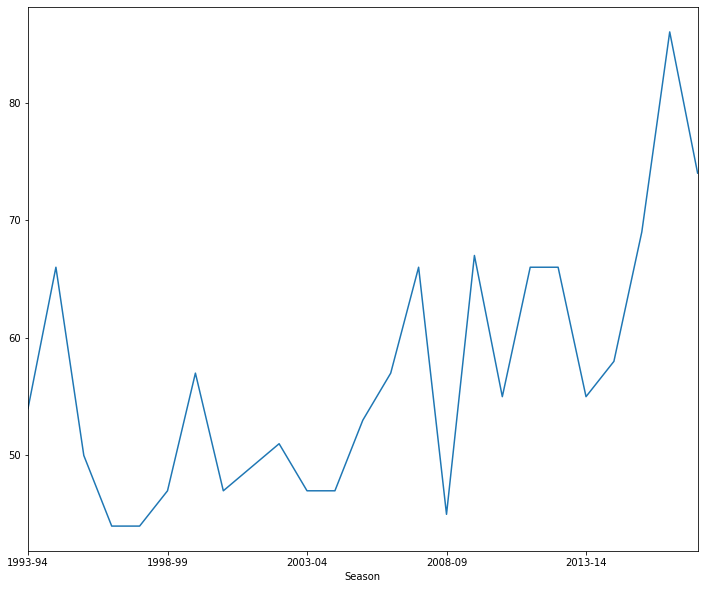

In [343]:
plt.figure(figsize=(12,10))
Season_goaltot.plot(kind="barh")

시즌별 실점

In [35]:
Season_losegoaltot=Home_Goaltot.FTAG+Away_Goaltot.FTHG
Season_losegoaltot.head()

Season
1993-94    59
1994-95    58
1995-96    38
1996-97    51
1997-98    56
dtype: int64

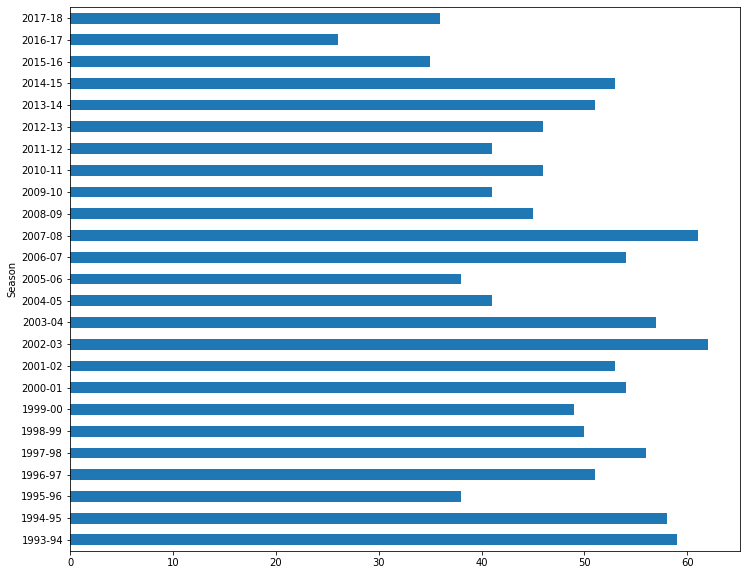

In [36]:
plt.figure(figsize=(12,10))
Season_losegoaltot.plot(kind="barh")

시즌별 득실차

In [37]:
Season_tot=Season_goaltot-Season_losegoaltot

In [38]:
Season_tot.head()

Season
1993-94    -5
1994-95     8
1995-96    12
1996-97    -7
1997-98   -12
dtype: int64

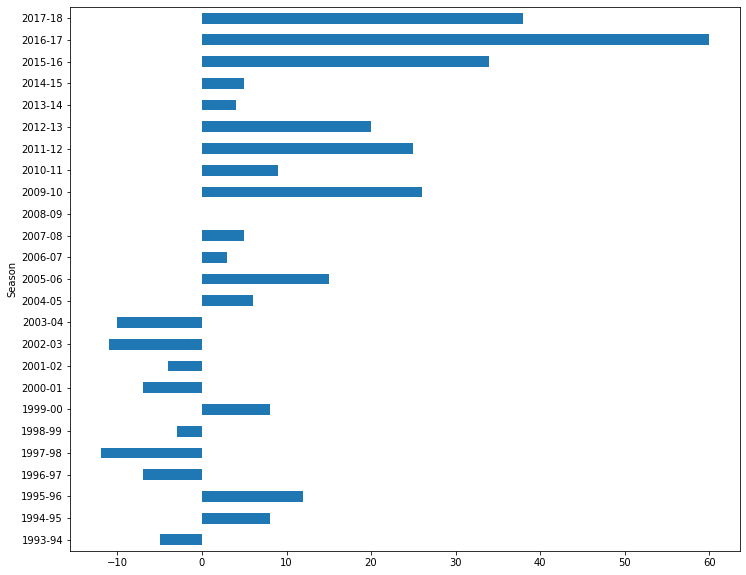

In [39]:
plt.figure(figsize=(12,10))
Season_tot.plot(kind="barh")

---
승점과 득실점은 서로 관련이 있는가??

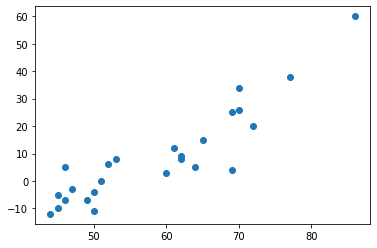

In [40]:
plt.scatter(Season_tot_Point,Season_tot) 
# 승점과 득실점은 상관관계가 있다고 볼 수있다.

# 4. 최다 득실차

이번 19/20 시즌에도 나온 사우스햄튼 과 레스터시티가 0:9 라는 결과를 가지게 되었다. <br>
이처럼 골이 많이 나온 경기를 찾아보았다.

In [41]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,14/08/93,Arsenal,Coventry,0,3,A,0,0,0,1993-94
1,14/08/93,Aston Villa,QPR,4,1,H,0,0,0,1993-94
2,14/08/93,Chelsea,Blackburn,1,2,A,0,0,0,1993-94
3,14/08/93,Liverpool,Sheffield Weds,2,0,H,0,0,0,1993-94
4,14/08/93,Man City,Leeds,1,1,D,0,0,0,1993-94


In [42]:
df.sort_values(by="FTHG",ascending=False)
# 홈팀 기준 최다 득실차는 맨유 VS 입스위치 경기

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
6370,22/11/09,Tottenham,Wigan,9,1,H,1,0,H,2009-10
787,4/3/1995,Man United,Ipswich,9,0,H,0,0,0,1994-95
2518,19/09/99,Newcastle,Sheffield Weds,8,0,H,4,0,H,1999-00
8220,18/10/14,Southampton,Sunderland,8,0,H,3,0,H,2014-15
7029,28/08/11,Man United,Arsenal,8,2,H,3,1,H,2011-12
...,...,...,...,...,...,...,...,...,...,...
4050,19/10/03,Everton,Southampton,0,0,D,0,0,D,2003-04
4049,19/10/03,Birmingham,Aston Villa,0,0,D,0,0,D,2003-04
4047,18/10/03,Middlesbrough,Newcastle,0,1,A,0,1,A,2003-04
4045,18/10/03,Leeds,Man United,0,1,A,0,0,D,2003-04


In [43]:
df.sort_values(by="FTAG",ascending=False)
# 어웨이 팀 기준 득실차는 노팅엄포리스트 VS 맨유 경기

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
2300,6/2/1999,Nott'm Forest,Man United,1,8,A,1,2,A,1998-99
839,1/4/1995,Sheffield Weds,Nott'm Forest,1,7,A,0,0,0,1994-95
9277,21/05/17,Hull,Tottenham,1,7,A,0,3,A,2016-17
5843,28/04/08,Derby,Arsenal,2,6,A,1,2,A,2007-08
8782,14/02/16,Aston Villa,Liverpool,0,6,A,0,2,A,2015-16
...,...,...,...,...,...,...,...,...,...,...
7233,1/2/2012,Sunderland,Norwich,3,0,H,2,0,H,2011-12
2262,29/12/98,Chelsea,Man United,0,0,D,0,0,D,1998-99
7235,4/2/2012,Man City,Fulham,3,0,H,2,0,H,2011-12
7236,4/2/2012,Norwich,Bolton,2,0,H,0,0,D,2011-12


가장 득실차가 많은 경기는 09/10 시즌 토트넘과 위건 이었고 9:1 이라는 10골이 터진 경기 이다.

홈팀 기준 어웨이 팀 기준으로 종합하여 보았을 때 94/95 시즌 맨유와 입스위치 경기가 9:0으로 <br>
이번 시즌의 사우스햄튼과 레스터시티같이 가장 상대와 많이 벌어진 경기라고 볼 수 있다.

# 5. 토트넘과 가장 많이 경기를 한 클럽

5-(1) 홈 이었을 때 가장 많이 경기를 한 팀

In [44]:
Home_tot = tot.loc[tot.HomeTeam=="Tottenham",:]
Home_tot.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,Point
Date,,,,,,,,,,
16/08/93,Tottenham,Arsenal,0,1,A,0,0,0,1993-94,0
21/08/93,Tottenham,Man City,1,0,H,0,0,0,1993-94,3
1/9/1993,Tottenham,Chelsea,1,1,D,0,0,0,1993-94,1
18/09/93,Tottenham,Oldham,5,0,H,0,0,0,1993-94,3
3/10/1993,Tottenham,Everton,3,2,H,0,0,0,1993-94,3


In [45]:
Home_tot=Home_tot["AwayTeam"].value_counts()

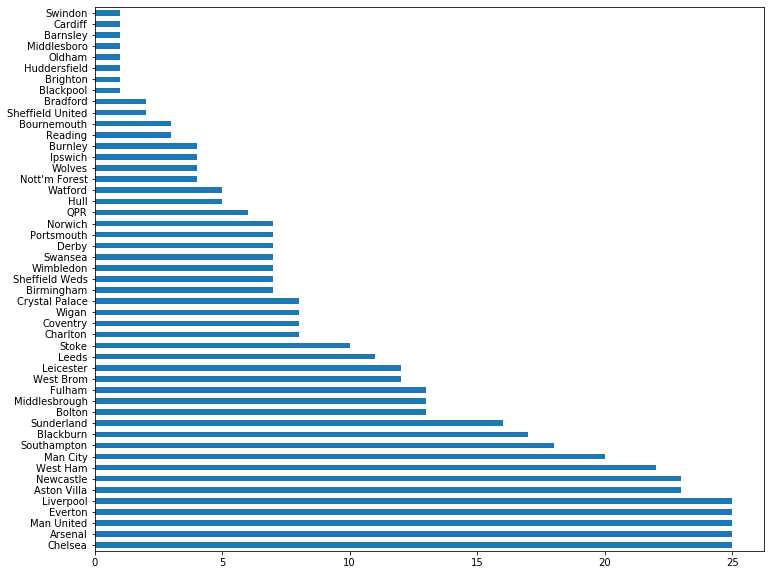

In [46]:
plt.figure(figsize=(12,10))
Home_tot.plot(kind="barh",fontsize=10)

5-(2)어웨이 이었을 때 가장 많이 경기를 한 팀

In [47]:
Away_tot=tot.loc[tot.AwayTeam=="Tottenham",:]
Away_tot.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,Point
Date,,,,,,,,,,
14/08/93,Newcastle,Tottenham,0,1,A,0,0,0,1993-94,0
25/08/93,Liverpool,Tottenham,1,2,A,0,0,0,1993-94,0
28/08/93,Aston Villa,Tottenham,1,0,H,0,0,0,1993-94,3
11/9/1993,Sheffield United,Tottenham,2,2,D,0,0,0,1993-94,1
26/09/93,Ipswich,Tottenham,2,2,D,0,0,0,1993-94,1


In [48]:
Away_tot=Away_tot["HomeTeam"].value_counts()

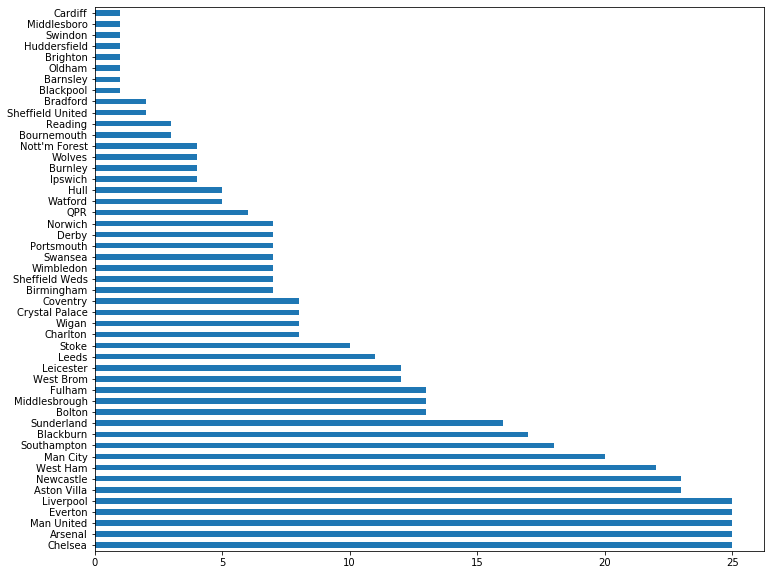

In [49]:
plt.figure(figsize=(12,10))
Away_tot.plot(kind="barh",fontsize=10)

In [50]:
total_tot=Away_tot+Home_tot
total_tot.head()

Arsenal        50
Aston Villa    46
Barnsley        2
Birmingham     14
Blackburn      34
dtype: int64

가장 경기를 많이 한 팀 

In [51]:
total_tot.sort_values(ascending=False).head(10)

Liverpool      50
Man United     50
Chelsea        50
Everton        50
Arsenal        50
Newcastle      46
Aston Villa    46
West Ham       44
Man City       40
Southampton    36
dtype: int64

In [52]:
df.Season.unique().shape

(25,)

1시즌에 2경기씩 하여 <br>
==>  <b>리버풀, 맨유 , 첼시, 에버튼, 아스날</b> 과 가장 많이 하였다.

# 6. 아스날과의 기록 

5-(1) 토트넘이 홈이었을 때 

In [72]:
tot_are=tot.loc[(tot.HomeTeam=="Tottenham")&(tot.AwayTeam=="Arsenal"),:]
tot_are=tot_are[["HomeTeam","AwayTeam","FTHG","FTAG","FTR","Season"]]

In [73]:
tot_are["Battle"]=tot_are["FTR"]

In [74]:
tot_are.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Season,Battle
Date,,,,,,,
16/08/93,Tottenham,Arsenal,0,1,A,1993-94,A
2/1/1995,Tottenham,Arsenal,1,0,H,1994-95,H
18/11/95,Tottenham,Arsenal,2,1,H,1995-96,H
15/02/97,Tottenham,Arsenal,0,0,D,1996-97,D
28/12/97,Tottenham,Arsenal,1,1,D,1997-98,D


In [75]:
def battle (x):
    if x=="H" : return "W"
    elif x=="A" : return "L"
    else : return "D"
# 홈에서 이겼으니 W 지면 L

In [76]:
tot_are["Battle"]=tot_are["Battle"].apply(battle)

In [149]:
tot_are.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Season,Battle
Date,,,,,,,
16/08/93,Tottenham,Arsenal,0,1,A,1993-94,L
2/1/1995,Tottenham,Arsenal,1,0,H,1994-95,W
18/11/95,Tottenham,Arsenal,2,1,H,1995-96,W
15/02/97,Tottenham,Arsenal,0,0,D,1996-97,D
28/12/97,Tottenham,Arsenal,1,1,D,1997-98,D


In [152]:
tot_are_count = tot_are["Battle"].value_counts()

In [154]:
tot_are_count

D    11
W     9
L     5
Name: Battle, dtype: int64

5-(2) 토트넘이 어웨이 이었을 때 

In [155]:
are_tot=tot.loc[(tot.HomeTeam=="Arsenal")&(tot.AwayTeam=="Tottenham"),:]
are_tot=are_tot[["HomeTeam","AwayTeam","FTHG","FTAG","FTR","Season"]]

In [156]:
are_tot["Battle"]=are_tot["FTR"]

In [157]:
are_tot.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Season,Battle
Date,,,,,,,
6/12/1993,Arsenal,Tottenham,1,1,D,1993-94,D
29/04/95,Arsenal,Tottenham,1,1,D,1994-95,D
15/04/96,Arsenal,Tottenham,0,0,D,1995-96,D
24/11/96,Arsenal,Tottenham,3,1,H,1996-97,H
30/08/97,Arsenal,Tottenham,0,0,D,1997-98,D


In [158]:
def battle (x):
    if x=="H" : return "L"
    elif x=="A" : return "W"
    else : return "D"
# 어웨이에서 이겨서 A 는 W 

In [159]:
are_tot["Battle"]=are_tot["Battle"].apply(battle)

In [160]:
are_tot.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Season,Battle
Date,,,,,,,
6/12/1993,Arsenal,Tottenham,1,1,D,1993-94,D
29/04/95,Arsenal,Tottenham,1,1,D,1994-95,D
15/04/96,Arsenal,Tottenham,0,0,D,1995-96,D
24/11/96,Arsenal,Tottenham,3,1,H,1996-97,L
30/08/97,Arsenal,Tottenham,0,0,D,1997-98,D


In [161]:
are_tot_count = are_tot["Battle"].value_counts()

In [162]:
are_tot_count

L    14
D    10
W     1
Name: Battle, dtype: int64

In [163]:
total_tot_are_count = tot_are_count+ are_tot_count

In [164]:
total_tot_are_count

D    21
L    19
W    10
Name: Battle, dtype: int64

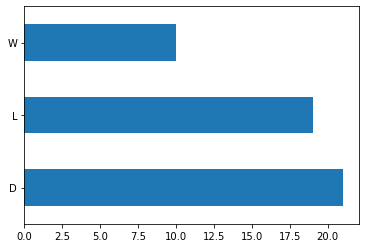

In [165]:
total_tot_are.plot(kind="barh")

아스날에게 패배가 승리보다 2배 이상 더 많다.

----

## 시즌별로 자세히 보기 

In [176]:
total=pd.merge(tot_are,are_tot,on="Season")
# 시즌으로 서로 묶는다

In [167]:
total.head()

,HomeTeam_x,AwayTeam_x,FTHG_x,FTAG_x,FTR_x,Season,Battle_x,HomeTeam_y,AwayTeam_y,FTHG_y,FTAG_y,FTR_y,Battle_y
0,Tottenham,Arsenal,0,1,A,1993-94,L,Arsenal,Tottenham,1,1,D,D
1,Tottenham,Arsenal,1,0,H,1994-95,W,Arsenal,Tottenham,1,1,D,D
2,Tottenham,Arsenal,2,1,H,1995-96,W,Arsenal,Tottenham,0,0,D,D
3,Tottenham,Arsenal,0,0,D,1996-97,D,Arsenal,Tottenham,3,1,H,L
4,Tottenham,Arsenal,1,1,D,1997-98,D,Arsenal,Tottenham,0,0,D,D


In [177]:
total = total[["Season","Battle_x","Battle_y"]]
# 필요한 정보만 뽑아온다

In [169]:
total=total.set_index("Season")

In [178]:
total["TOT_WIN"]= total["Battle_x"].apply(lambda x: 1 if x=="W" else 0)+total["Battle_y"].apply(lambda x: 1 if x=="W" else 0)

In [171]:
total["TOT_DRAW"]= total["Battle_x"].apply(lambda x: 1 if x=="D" else 0)+total["Battle_y"].apply(lambda x: 1 if x=="D" else 0)

In [172]:
total["TOT_LOSE"]= total["Battle_x"].apply(lambda x: 1 if x=="L" else 0)+total["Battle_y"].apply(lambda x: 1 if x=="L" else 0)

In [173]:
total.head()

,Battle_x,Battle_y,TOT_WIN,TOT_DRAW,TOT_LOSE
Season,,,,,
1993-94,L,D,0,1,1
1994-95,W,D,1,1,0
1995-96,W,D,1,1,0
1996-97,D,L,0,1,1
1997-98,D,D,0,2,0


In [174]:
total=total[["TOT_WIN","TOT_DRAW","TOT_LOSE"]]

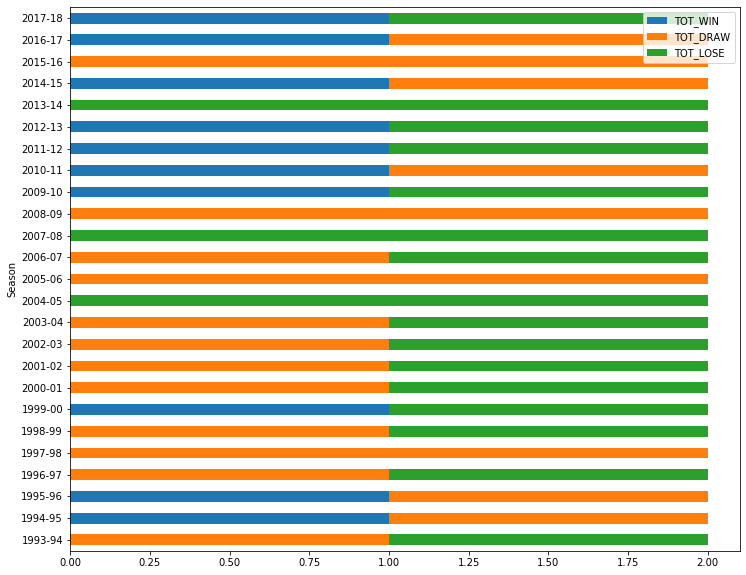

In [175]:
total.plot(kind="barh",stacked=True,figsize=(12,10))

그래프를 보았을 때 파랑색(토트넘 승)이 적고 초로색(아스날 승)이 많은 것을 한 눈에 볼 수 있다.<br>
심지어 토트넘은 한 시즌동안 아스날을 상대로 2번의 승리를 가진 적은 한번도 없었다.